In [11]:
import pickle
import re
from datetime import datetime
import numpy as np
randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
with open('movies2.pkl', 'r') as f:
    moviesdata = pickle.load(f)
years = range(1999, 2014)

### Challenge One

In [3]:
md = moviesdata[moviesdata.title != ('Twin Sisters')]
md['gross'] = md['worldgross'] / md['theaters']
md['awarded'] = md['oscars'] > 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [4]:
mdth_lm = smf.ols(formula='oscars ~ nominations', data=md).fit()
mdth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oscars   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     546.0
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           5.15e-84
Time:                        15:43:32   Log-Likelihood:                -677.21
No. Observations:                 543   AIC:                             1358.
Df Residuals:                     541   BIC:                             1367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3328      0.053     -6.323      0.000        -0.436    -0.229
nominations     0.3411      0.015     23.367      0.000         0.312     0.370
==============================================================================
Omnibus:                      302.005   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6014.642
Skew:                           1.995   Prob(JB):                         0.00
Kurtosis:                      18.809   Cond. No.                         5.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


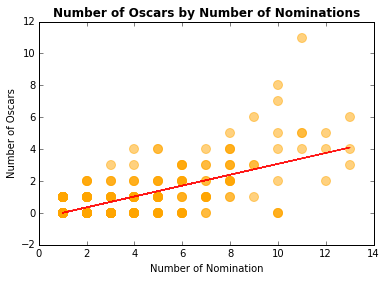

In [26]:
%pylab inline
plt.scatter(md['nominations'], md['oscars'], alpha=0.5, s=80, color='orange')
plt.title('Number of Oscars by Number of Nominations', fontweight='bold')
plt.xlabel("Number of Nomination")
plt.ylabel("Number of Oscars")
plt.plot(md['nominations'], mdth_lm.params[0] + (mdth_lm.params[1] * md['nominations']), 'r', alpha=0.9)

In [9]:
md05 = md[:5]

In [26]:
all05_lm = smf.ols(formula='oscars ~ nominations', data=md05).fit()
all05_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oscars   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.241
Method:                 Least Squares   F-statistic:                    0.2239
Date:                Sun, 26 Apr 2015   Prob (F-statistic):              0.668
Time:                        01:02:12   Log-Likelihood:                -9.2648
No. Observations:                   5   AIC:                             22.53
Df Residuals:                       3   BIC:                             21.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.1333      1.667      0.080      0.941        -5.172     5.439
nominations     0.2222      0.470      0.473      0.668        -1.272     1.717
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.074
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.265
Skew:                           1.232   Prob(JB):                        0.531
Kurtosis:                       2.950   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
all05_lm.params

Intercept      0.133333
nominations    0.222222
dtype: float64

In [18]:
predicted =[]
actual = md.oscars[5:]
print actual
for v in range(5, len(md)+1):
    predicted.append(all05_lm.predict(md.nominations[v]))
    
predicted

5     1
6     0
7     0
8     0
9     5
10    1
11    0
12    0
13    0
14    2
15    0
16    0
17    0
18    0
19    0
...
529    0
530    0
531    0
532    0
533    0
534    0
535    1
536    1
537    0
538    0
539    0
540    0
541    0
542    0
543    0
Name: oscars, Length: 538, dtype: int64


IndexError: invalid index to scalar variable.

In [ ]:
rms = sqrt(mean_squared_error(y_actual, y_predicted))